In [1]:
%pip install matplotlib tifffile scipy tqdm pybaselines


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2e/51/c77a14869b7eb9d6fb440e811b754fc3950d6868c38ace57d0632b674415/matplotlib-3.8.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for tifffile from https://files.pythonhosted.org/packages/f5/72/68ea763b5f3e3d9871492683059ed4724fd700dbe54aa03cdda7a9692129/tifffile-2023.9.26-py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/c6/a1/357e4cd43af2748e1e0407ae0e9a5ea8aaaa6b702833c81be11670dcbad8/scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ------------------------

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
#import cv2
#from PIL import Image
#from pybaselines.whittaker import asls
from scipy import interpolate
from scipy.ndimage import gaussian_filter
from scipy.signal import cheby1, filtfilt, find_peaks, peak_widths
from tqdm import tqdm

In [3]:
video_11_01 = "//files.ubc.ca/team/BNRC/NINC/Raymond Lab/Kaiiiii/cortical data/Pilot/2023_11_01/405700_f3_stage2_pilot_day3_violet.tif"

In [15]:
frames = tifffile.imread(video_11_01)

  0%|                                                                                        | 0/18133 [00:58<?, ?it/s]


In [18]:
frames.shape
frames.dtype

dtype('uint16')

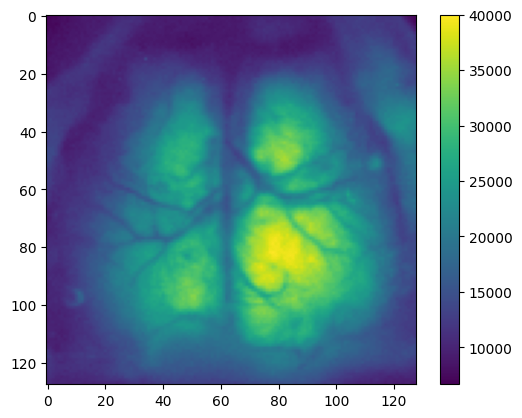

In [19]:
plt.figure()
plt.imshow(frames[5000])
plt.colorbar()

In [20]:
mean_timecourse = frames.mean(axis=(1,2))

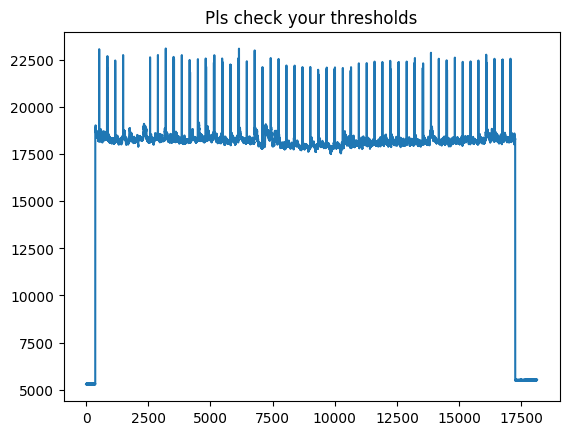

In [21]:
plt.figure()
plt.title("Pls check your thresholds")
plt.plot(mean_timecourse)

In [22]:
MAGIC_THRESHOLD = 7000

brain_indices = np.where(mean_timecourse > MAGIC_THRESHOLD)[0]
start_index = brain_indices[0]+1
end_index = brain_indices[-1]

In [23]:
frames = frames[start_index:end_index, :, :]
mean_timecourse = mean_timecourse[start_index:end_index]

In [24]:
T_mean = mean_timecourse.mean()
std = mean_timecourse.std()
light_indices = find_peaks(mean_timecourse, height=(T_mean + 3 * std), distance=10)[0]

In [25]:
interp_indices = []
for index in light_indices:
    start = index-3
    end = index+3
    group = []
    for new_index in range(start, end+1):
        group.append(new_index)
    interp_indices.append(group)

In [26]:
x = [0, 6]
xnew = np.linspace(0, 6, np.shape(interp_indices)[1])
for g in tqdm(range(len(interp_indices[:]))):
    y_2d = [frames[interp_indices[g][0]], frames[interp_indices[g][-1]]]
    for r in range(frames.shape[1]):
        for c in range(frames.shape[2]):
            y = [y_2d[0][r, c], y_2d[1][r, c]]
            f = interpolate.interp1d(x, y)
            ynew = f(xnew)
            frames[interp_indices[g], r, c] = ynew[:]
            

100%|██████████████████████████████████████████████████████████████████████████████████| 71/71 [01:50<00:00,  1.55s/it]


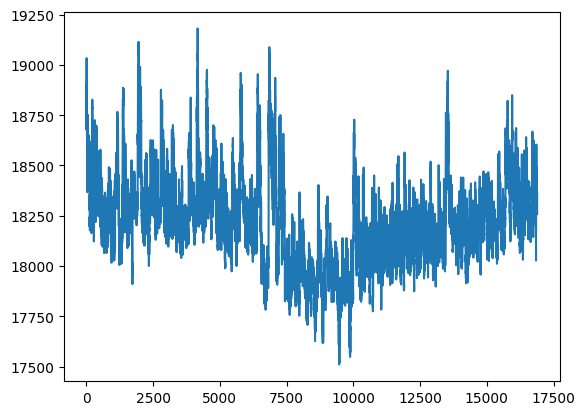

In [27]:
plt.figure()
plt.plot(frames.mean(axis=(1,2)))

In [17]:
mean_timecourse = frames.mean(axis=(1,2))
T_mean = mean_timecourse.mean()
std = mean_timecourse.std()
light_indices = find_peaks(mean_timecourse, height=(T_mean + 3 * std), distance=10)[0]